## Importing important modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

## Performing Feature Engineering

In [4]:
vgsales=pd.read_csv("C:/Users/HP/Desktop/vgsales.csv")
vgsales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
vgsales.shape

(16598, 11)

In [6]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
# checking for the null values
vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
# dropping the null values
vgsales= vgsales.dropna(subset=['Year','Publisher'], axis=0)
vgsales.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
# Remove any duplicate rows
vgsales = vgsales.drop_duplicates()

In [11]:
# Resetting the index of the data
vgsales = vgsales.reset_index(drop=True)

## Performing EDA

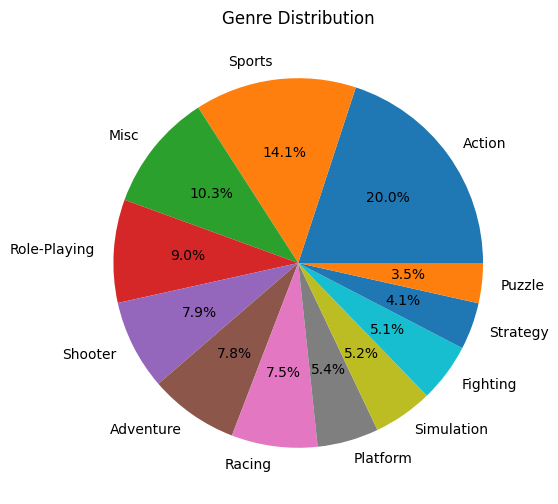

In [12]:
# Calculate the count of each genre
genre_counts = vgsales['Genre'].value_counts()
# Plot a pie chart of genre distribution
plt.figure(figsize=(10, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title('Genre Distribution')
plt.show()

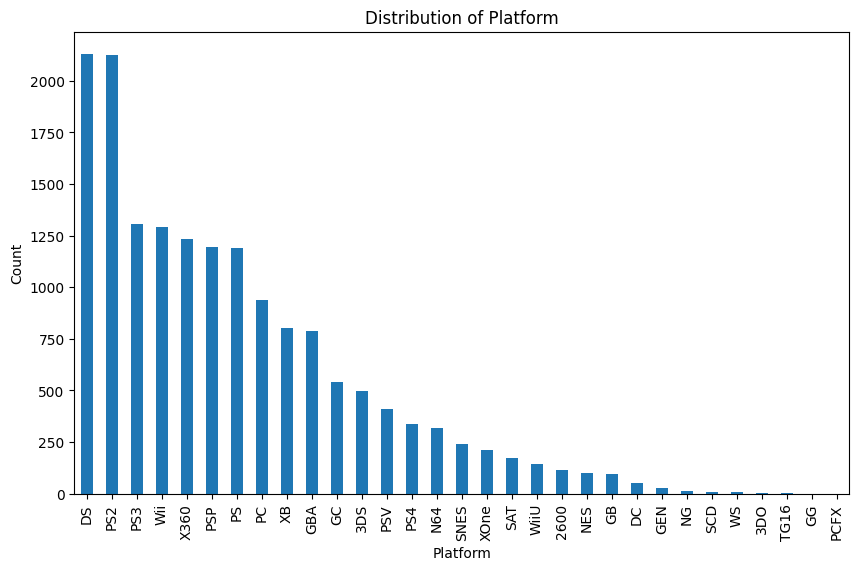

In [13]:
#distribution of different platforms
plt.figure(figsize=(10, 6))
vgsales['Platform'].value_counts().plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title(f'Distribution of Platform')
plt.show()

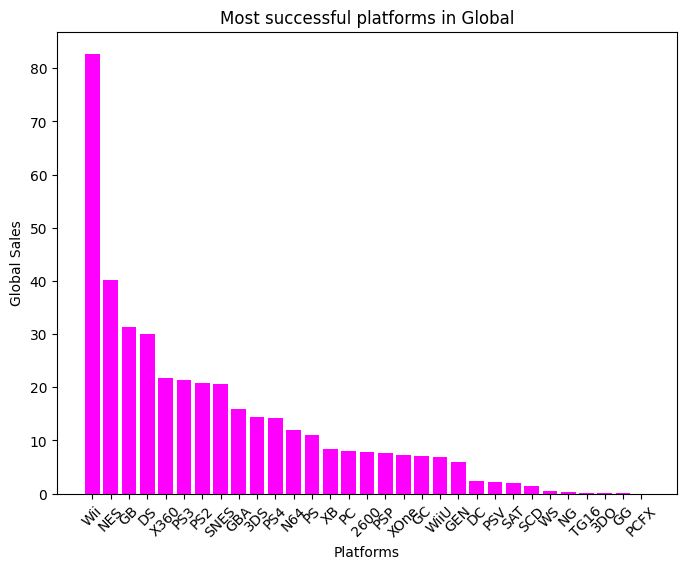

In [14]:
#global sales with respect to platform
plt.figure(figsize=(8, 6))
plt.bar(data=vgsales, x='Platform', height='Global_Sales', color = 'magenta')
plt.xticks(rotation=45)
plt.xlabel('Platforms')
plt.ylabel('Global Sales')
plt.title('Most successful platforms in Global')
plt.show()

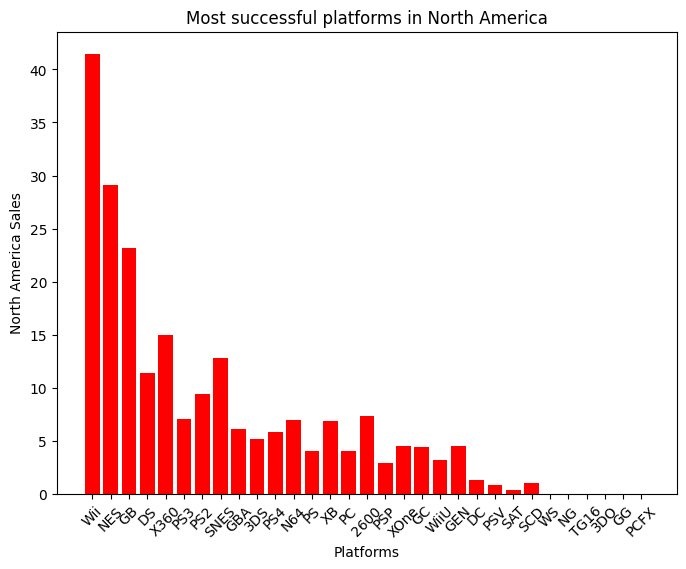

In [15]:
#north america sales with respect to platform
plt.figure(figsize=(8, 6))
plt.bar(data=vgsales, x='Platform', height='NA_Sales', color = 'red')
plt.xticks(rotation=45)
plt.xlabel('Platforms')
plt.ylabel('North America Sales')
plt.title('Most successful platforms in North America')
plt.show()

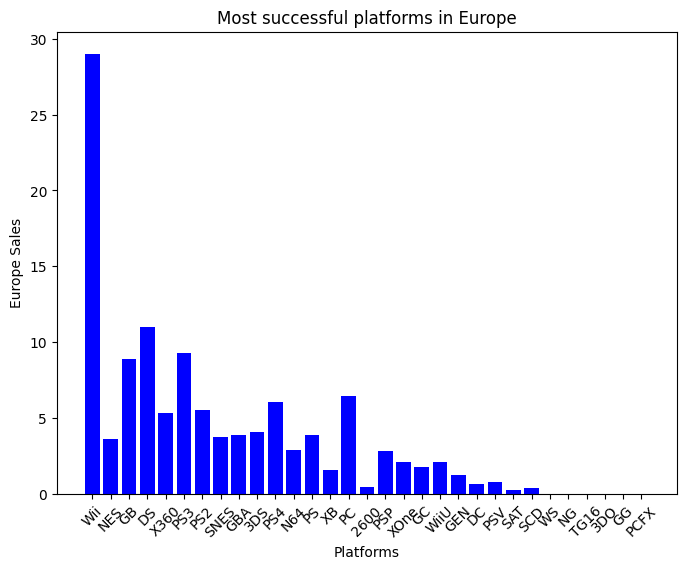

In [16]:
#europe sales with respect to platform
plt.figure(figsize=(8, 6))
plt.bar(data=vgsales, x='Platform', height='EU_Sales', color = 'blue')
plt.xticks(rotation=45)
plt.xlabel('Platforms')
plt.ylabel('Europe Sales')
plt.title('Most successful platforms in Europe')
plt.show()

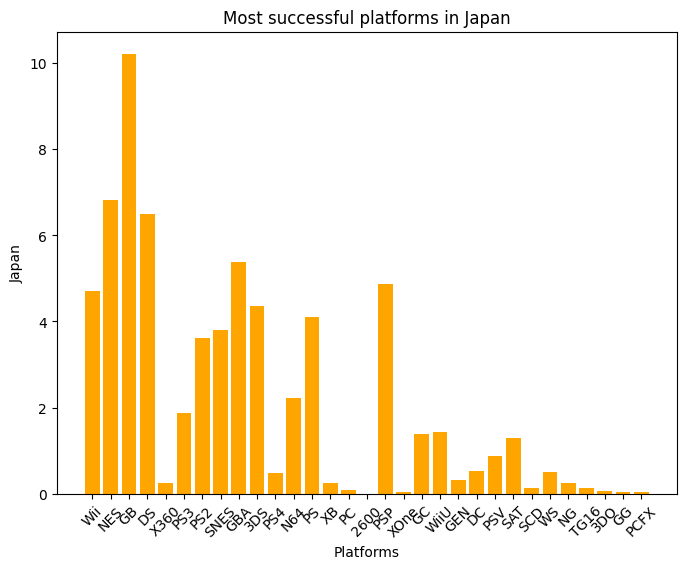

In [17]:
#japan sales with respect to platform
plt.figure(figsize=(8, 6))
plt.bar(data=vgsales, x='Platform', height='JP_Sales', color = 'orange')
plt.xticks(rotation=45)
plt.xlabel('Platforms')
plt.ylabel('Japan')
plt.title('Most successful platforms in Japan')
plt.show()

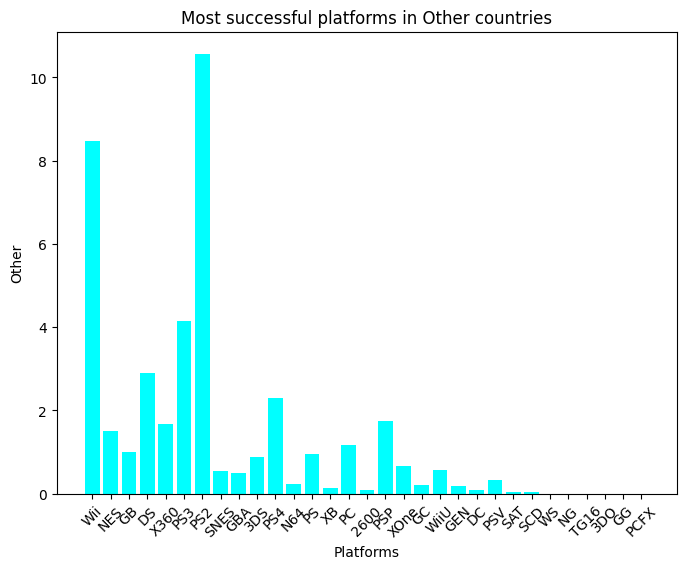

In [18]:
#other sales with respect to platform
plt.figure(figsize=(8, 6))
plt.bar(data=vgsales, x='Platform', height='Other_Sales', color = 'cyan')
plt.xticks(rotation=45)
plt.xlabel('Platforms')
plt.ylabel('Other')
plt.title('Most successful platforms in Other countries')
plt.show()

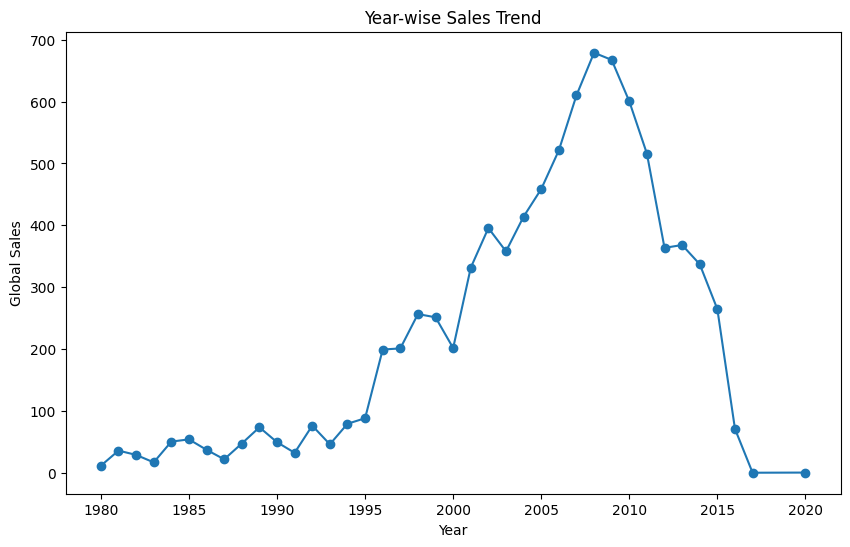

In [19]:
# Group data by Year and calculate total sales for each year
yearly_sales = vgsales.groupby('Year')['Global_Sales'].sum()
# Plot the sales trend over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Year-wise Sales Trend')
plt.show()

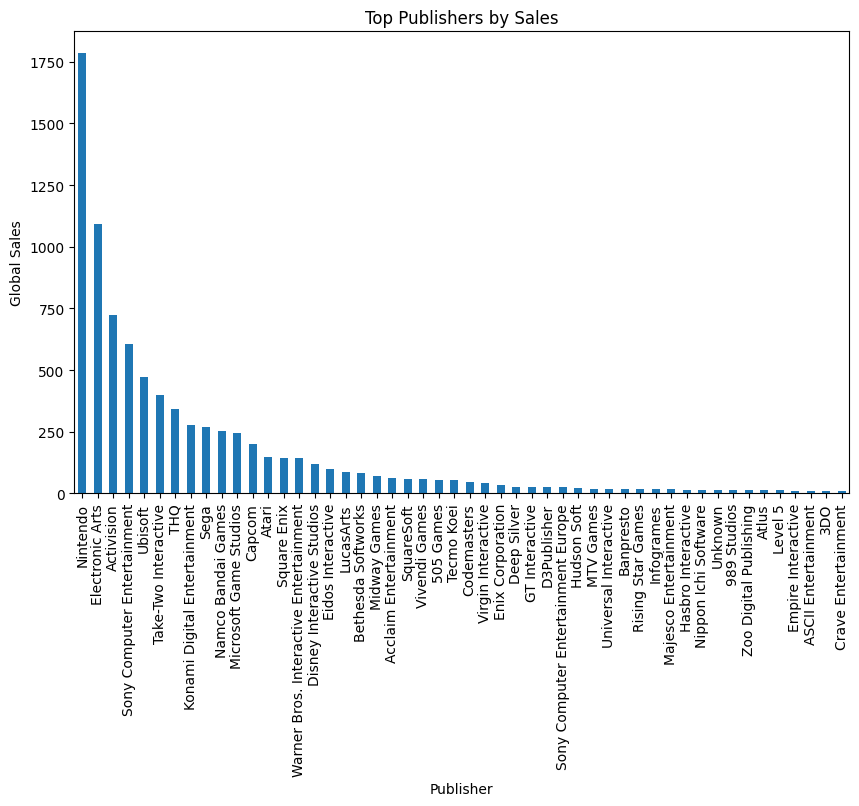

In [20]:
# Group data by Publisher and calculate total sales for each publisher
publisher_sales = vgsales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Plot the top publishers by sales
top_publishers = publisher_sales.head(50)
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.title('Top Publishers by Sales')
plt.show()

<Figure size 1000x600 with 0 Axes>

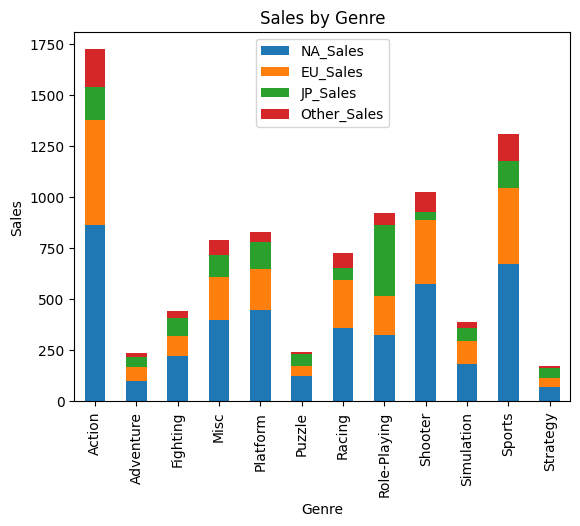

In [21]:
# Group data by Genre and calculate total sales for each genre
genre_sales = vgsales.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Create a stacked bar chart of sales by genre
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', stacked=True)
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.title('Sales by Genre')
plt.legend(loc='upper center')
plt.show()

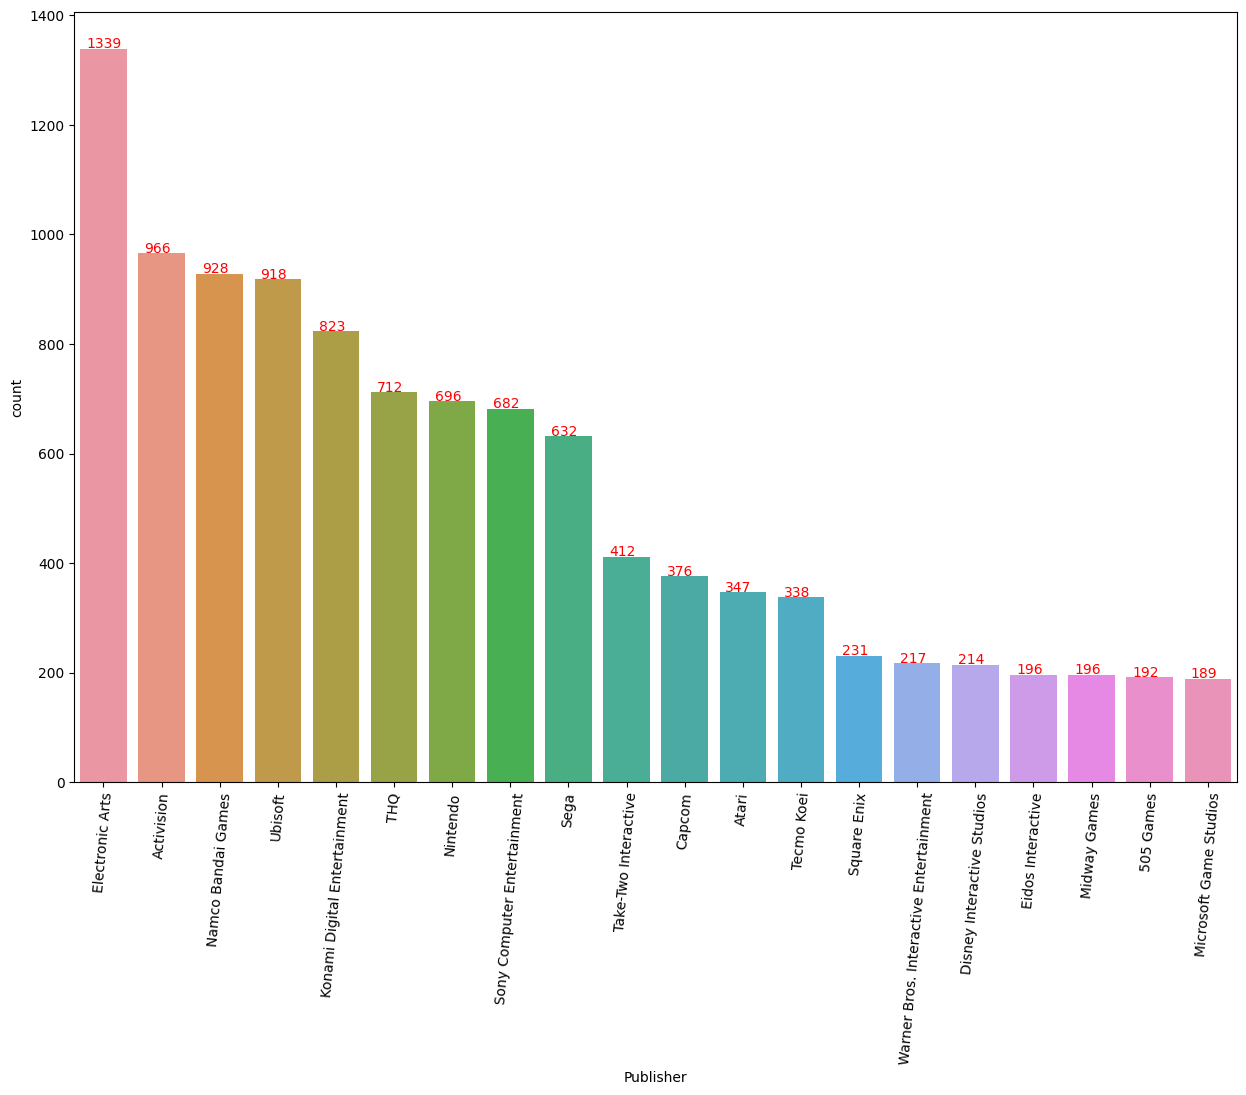

In [22]:
publishers = vgsales.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
publishers = pd.DataFrame(publishers).reset_index()
plt.figure(figsize=(15, 10))
ax=sns.countplot(x="Publisher", data=vgsales, order = vgsales.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=85)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.10, p.get_height()+1),color= 'red')

## Splitting Train and Test Data

In [23]:
#performing label encoding on the data
label_encoder = LabelEncoder()
vgsales['Platform'] = label_encoder.fit_transform(vgsales['Platform'].astype('str'))
vgsales['Genre'] = label_encoder.fit_transform(vgsales['Genre'].astype('str'))
vgsales['Publisher'] = label_encoder.fit_transform(vgsales['Publisher'].astype('str'))

# Calculate the total sales per game
vgsales['Total_Sales'] = vgsales['NA_Sales'] + vgsales['EU_Sales'] + vgsales['JP_Sales'] + vgsales['Other_Sales']

# Drop unnecessary columns
vgsales = vgsales.drop(['Rank', 'Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

# Separate the features and the target variable
features = vgsales.drop(['Global_Sales'], axis=1)
target = vgsales['Global_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Implementing different models

### Linear Regression

In [38]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Calculate evaluation metrics

lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)
lr_train = linear_model.score(X_train, y_train)
lr_test = linear_model.score(X_test, y_test)

# Print evaluation metrics
print("Training Accuracy :", lr_train)
print("Testing Accuracy :", lr_test)
print("Mean Squared Error (MSE):", lr_mse)
print("Mean Absolute Error (MAE):", lr_mae)
print("R-squared (R2):", lr_r2)

Training Accuracy : 0.9999865405103248
Testing Accuracy : 0.9999933093263774
Mean Squared Error (MSE): 2.8622485985601173e-05
Mean Absolute Error (MAE): 0.003055629244396619
R-squared (R2): 0.9999933093263774


### Random Forest

In [39]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
rf_train= rf_model.score(X_train, y_train)
rf_test=rf_model.score(X_test, y_test)

# Print evaluation metrics
print("Training Accuracy :",rf_train)
print("Testing Accuracy :", rf_test)
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)

Training Accuracy : 0.9994811542152968
Testing Accuracy : 0.8446149070861749
Mean Squared Error (MSE): 0.6647324163726015
Mean Absolute Error (MAE): 0.01994558505871408
R-squared (R2): 0.8446149070861749


### Decision Tree

In [40]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

# Calculate evaluation metrics
dt_mse = mean_squared_error(y_test, y_pred)
dt_mae = mean_absolute_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)
dt_train=tree_model.score(X_train, y_train)
dt_test=tree_model.score(X_test, y_test)

# Print evaluation metrics
print("Training Accuracy :", dt_train)
print("Testing Accuracy :", dt_test)
print("Mean Squared Error (MSE):", dt_mse)
print("Mean Absolute Error (MAE):", dt_mae)
print("R-squared (R2):", dt_r2)

Training Accuracy : 0.9999998785439308
Testing Accuracy : 0.8415152782941601
Mean Squared Error (MSE): 0.6779925283829394
Mean Absolute Error (MAE): 0.021543418226449833
R-squared (R2): 0.8415152782941601


### Gradient Boosting

In [41]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

# Calculate evaluation metrics
gb_mse = mean_squared_error(y_test, y_pred)
gb_mae = mean_absolute_error(y_test, y_pred)
bg_r2 = r2_score(y_test, y_pred)
gb_train = gb_model.score(X_train, y_train)
gb_test = gb_model.score(X_test, y_test)

# Print evaluation metrics
print("Training Accuracy :",gb_train )
print("Testing Accuracy :", gb_test)
print("Mean Squared Error (MSE):", gb_mse)
print("Mean Absolute Error (MAE):", gb_mae)
print("R-squared (R2):", bg_r2)

Training Accuracy : 0.9999245676844866
Testing Accuracy : 0.8680040860830611
Mean Squared Error (MSE): 0.5646742629164397
Mean Absolute Error (MAE): 0.022007886818474473
R-squared (R2): 0.8680040860830611


### K Nearest Neighbours

In [42]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# Calculate evaluation metrics
knn_mse = mean_squared_error(y_test, y_pred)
knn_mae = mean_absolute_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)
knn_train = knn_model.score(X_train, y_train)
knn_test = knn_model.score(X_test, y_test)
# Print evaluation metrics
print("Training Accuracy :", knn_train)
print("Testing Accuracy :", knn_test)
print("Mean Squared Error (MSE):", knn_mse)
print("Mean Absolute Error (MAE):",knn_mae)
print("R-squared (R2):", knn_r2)

Training Accuracy : 0.9117035678786434
Testing Accuracy : 0.7416439933360646
Mean Squared Error (MSE): 1.1052386646210495
Mean Absolute Error (MAE): 0.27607241485118134
R-squared (R2): 0.7416439933360646


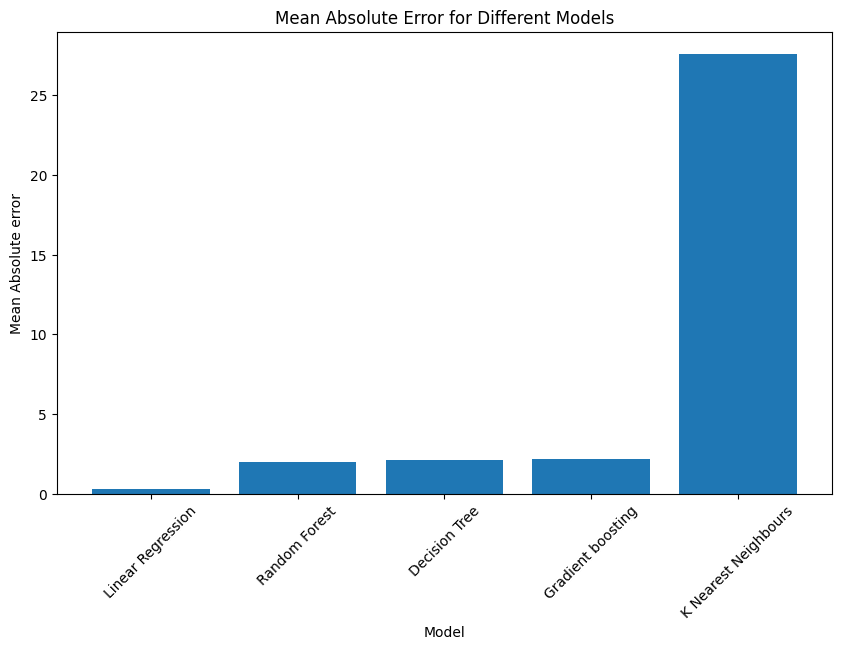

In [43]:
categories=['Linear Regression','Random Forest','Decision Tree','Gradient boosting','K Nearest Neighbours']
values=[lr_mae*100,rf_mae*100,dt_mae*100,gb_mae*100,knn_mae*100]
plt.figure(figsize=(10,6))
plt.bar(categories, values)
plt.xlabel('Model')
plt.ylabel('Mean Absolute error')
plt.title('Mean Absolute Error for Different Models')
plt.xticks(rotation=45)
plt.show()

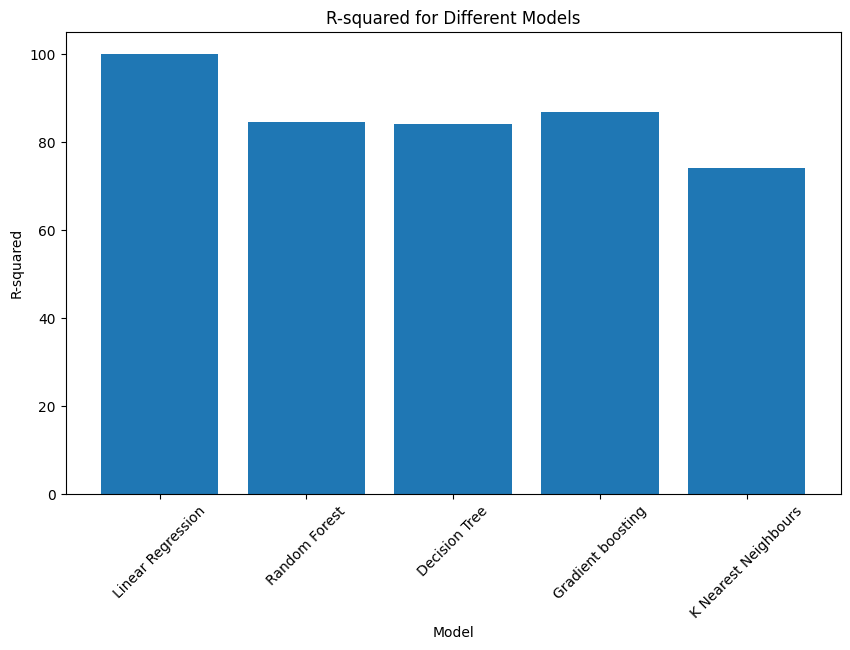

In [44]:
categories=['Linear Regression','Random Forest','Decision Tree','Gradient boosting','K Nearest Neighbours']
values=[lr_r2*100,rf_r2*100,dt_r2*100,bg_r2*100,knn_r2*100]
plt.figure(figsize=(10,6))
plt.bar(categories, values)
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('R-squared for Different Models')
plt.xticks(rotation=45)
plt.show()

In [46]:
categories=['Linear Regression','Random Forest','Decision Tree','Gradient boosting','K Nearest Neighbours']
training=[lr_train*100,rf_train*100,dt_train*100,gb_train*100,knn_train*100]
testing=[lr_test*100,rf_test*100,dt_test*100,gb_test*100,knn_test*100]

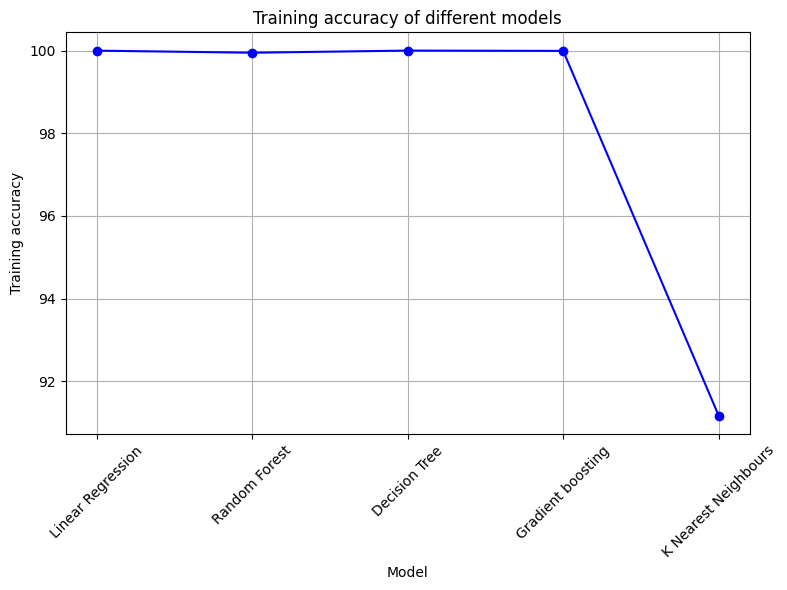

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(categories, training, color='blue', marker='o')
plt.xlabel('Model')
plt.ylabel('Training accuracy')
plt.title('Training accuracy of different models')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

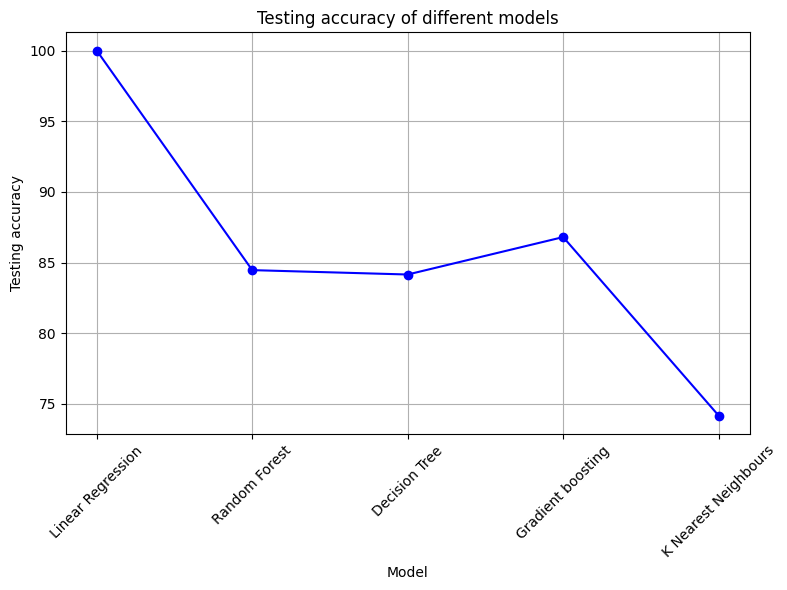

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(categories, testing, color='blue', marker='o')
plt.xlabel('Model')
plt.ylabel('Testing accuracy')
plt.title('Testing accuracy of different models')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()